# Cable & Wireless Communications

In this file you'll find a data set from one of our markets consisting of 225,754 users who joined our business between May 2019 and August 2019. For each user you have the available data of: Recharge, Revenue, ADPU (Average Data per User) and MOU (Minutes of Usage).

## Data Analisys

To understand the case of study, it's neccesary to dive in data and understand it's consistency, completeness and accuracy, also some standard metrics as means and quartils. That's the reason to start with some data comprehention and data cleaning.

In [1]:
# Loading requiered libraries
library(data.table)
library(reshape2)
library(ggplot2)
library(dplyr)


Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
#Loading Data
data <- fread("cwc_data.csv", dec = ".")
data$date_added <- as.Date(data$date_added, format = "%m/%d/%y")
head(data)
print(sprintf("Total of users subscribed: %s",nrow(data)))

user,date_added,Recharge_May,Revenue_May,ADPU_May,MOU_May,Recharge_June,Revenue_June,ADPU_June,MOU_June,Recharge_July,Revenue_July,ADPU_July,MOU_July,Recharge_August,Revenue_August,ADPU_August,MOU_August
<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2020-05-01,0.000000,0.4599997,0.00000,9.983333,0.00000,0.0118362,0.000000,0.250000,0.7692308,0.1228714,0.000000,2.666667,1.5384615,3.1056256,0.00000000,66.733333
2,2020-05-01,2.707692,2.9380505,0.00000,71.133333,0.00000,0.0000000,0.000000,16.700000,0.0000000,0.0000000,0.000000,0.000000,0.7692308,0.6627375,0.00000000,14.383333
3,2020-05-01,37.893615,23.9447767,3830.98756,1572.516667,12.80448,18.9328671,4550.145729,2956.383333,33.2630769,34.7875592,1029.724750,2666.116667,29.7600769,19.5737766,978.23851250,3345.250000
4,2020-05-01,8.923077,8.9506290,1354.35456,322.283333,2.37120,0.3360502,1.892122,3.266667,0.7692308,0.7069366,0.012003,0.000000,0.7692308,0.7692308,0.01140285,5.616667
5,2020-05-01,7.692308,7.0907448,36.39852,10.166667,1.58080,0.9309896,6.404196,1.600000,3.8461538,5.3108926,11.930114,26.216667,0.0000000,0.0000000,11.33360830,0.000000
6,2020-05-01,11.538462,11.6608214,153.51929,28.533333,0.00000,0.1112603,0.000000,2.350000,0.0000000,0.0000000,0.000000,0.000000,0.0000000,0.0000000,0.00000000,0.000000


[1] "Total of users subscribed: 225754"


In [3]:
#Summary of data (Without Cleaning)
cat("First approach to data and understanding of distributions. \n \n \n")
summary(data)

First approach to data and understanding of distributions. 
 
 


      user          date_added          Recharge_May       Revenue_May      
 Min.   :     1   Min.   :2020-05-01   Min.   :   0.000   Min.   :   0.000  
 1st Qu.: 56439   1st Qu.:2020-05-28   1st Qu.:   0.000   1st Qu.:   0.000  
 Median :112878   Median :2020-06-24   Median :   0.000   Median :   0.000  
 Mean   :112878   Mean   :2020-06-27   Mean   :   1.861   Mean   :   1.655  
 3rd Qu.:169316   3rd Qu.:2020-07-26   3rd Qu.:   3.077   3rd Qu.:   2.692  
 Max.   :225754   Max.   :2020-08-31   Max.   :1595.834   Max.   :1568.101  
    ADPU_May           MOU_May        Recharge_June       Revenue_June    
 Min.   :     0.0   Min.   :   0.00   Min.   :   0.000   Min.   :  0.000  
 1st Qu.:     0.0   1st Qu.:   0.00   1st Qu.:   0.000   1st Qu.:  0.000  
 Median :     0.0   Median :   0.00   Median :   0.000   Median :  0.000  
 Mean   :   225.3   Mean   :  32.34   Mean   :   3.300   Mean   :  2.978  
 3rd Qu.:     0.0   3rd Qu.:   0.00   3rd Qu.:   3.162   3rd Qu.:  3.398  
 Max.   :14

In [4]:
cat("Users subscribed by month")
table(month(data$date_added))

Users subscribed by month


    5     6     7     8 
64682 60252 53198 47622 

In [5]:
# Cleaning Data
#1. Cleaning incoherent usage in months before activation
data[,month_added := month(data$date_added)]
data <- melt(data, id.vars = c("user", "date_added", "month_added"))

temp_variable <- data.table(variable = levels(data$variable),
                            month = rep(5:8, each= 4),
                            action = rep(c("Recharge", "Revenue", "ADPU","MOU"), times = 4))

setkey(data, "variable"); setkey(temp_variable, "variable")
data <- data[temp_variable]
setorder(data, user, month, action)

cat("Validation of consistency. By business logic, is not possible to have any consumption neigther recharge of line before subscription." )
cat(sprintf("Taking this rule, data have %s inconsistent records to be normaliced.", nrow(data[month < month_added & value != 0])))
data[month <  month_added, value := 0]

Validation of consistency. By business logic, is not possible to have any consumption neigther recharge of line before subscription.Taking this rule, data have 2007 inconsistent records to be normaliced.

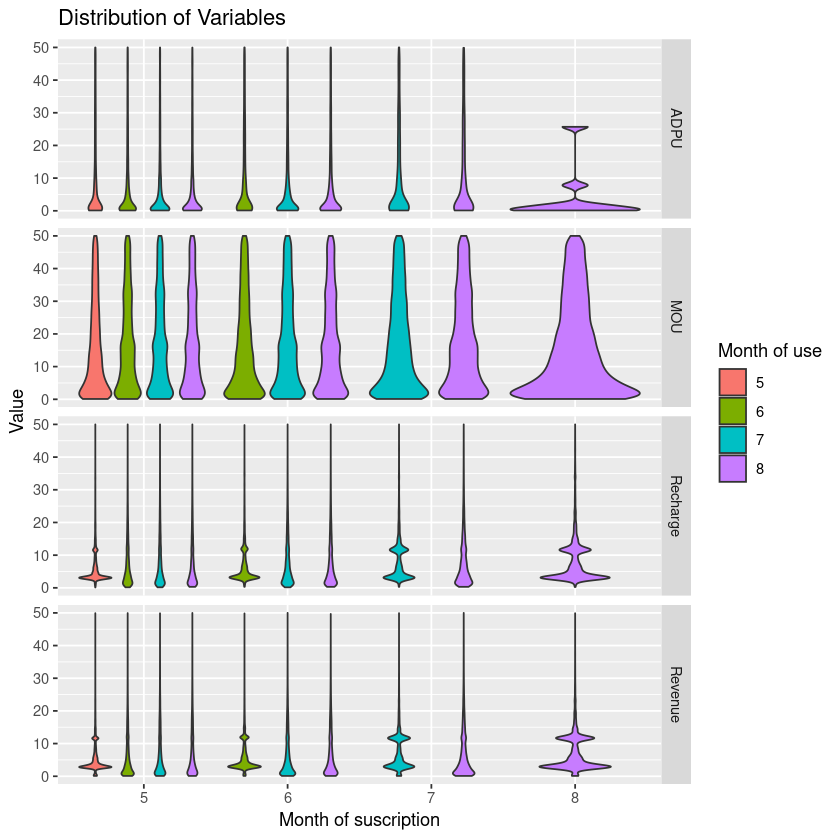

In [6]:
#Data description
data %>% 
  filter(value %between% c(0.1,50)) %>% 
  ggplot(aes(x=as.character(month_added),y=value, fill = factor(month))) +
  geom_violin() + labs(y="Value", x = "Month of suscription", fill = "Month of use") + 
  ggtitle("Distribution of Variables") + facet_grid(vars(action), scales = "free")

Distribution of data usage and minutes spend by month keep a similar and constant distribution during all time. 

It is relevant the bimodal distribution of Recharge and Revenue in their first month, flattened after second month, where they keep a distribution with positive skewness. This could be explained for first recharges have 2 options , one near to USD 2,75 and 11.5). 

Also, those distributions shows a reduction in the averaged ticket, keeping relation with common use of prepaid lines.

## Questions in Test
With the available data you'll need to answer to the couple situations and requests:

### 1) <strong>Phone Challenge:</strong>
Challenge consisting in giving away a new cell phone to those users who have reduced their recharge value if they increase their recharge value by X% amount. Using the total of customers added in <strong>May</strong>, please identify how many users have reduced their average recharge value from May to August. Considering an incremental in their august recharge value of 15%, and a cost of $25 per phone, what will be gross profit of the phone challenge? how many months does a customer from the phone challenge needs to recharge to breakeven the phone cost?


Taking those users tha decrease their average ticket from may to august and assuming: 
- Users that didn't recharge during july and august as inactive (not candidates for this campaign) or 
- Users without recharge or Revenue in august as inactive and 
- Value of average ticket as last recharge for those users that didn't recharge in august but something in July.

In [7]:
point_1 <- data %>% 
  filter(
    month_added==5,
    action == "Recharge") %>% 
  group_by(user) %>% 
  mutate(avg_rech=mean(value, na.rm = TRUE),
         rech_aug = last(value)) %>%
  ungroup() 



Inactive_1 <- intersect(data %>% 
                          filter(
                            month_added==5,
                            action == "Recharge", 
                            (month == 7 & value ==0) ) %>% select(user),
                        data %>% filter(
                          month_added==5,
                          action == "Recharge", 
                          (month == 8 & value ==0) ) %>% select(user)
)

Inactive_2 <- intersect(data %>% 
                          filter(
                            month_added==5,
                            action == "Recharge", 
                            (month == 8 & value ==0) ) %>% select(user),
                        data %>% filter(
                          month_added==5,
                          action == "Revenue", 
                          (month == 8 & value ==0) ) %>% select(user)
)

point_1$candidate <- FALSE
point_1$candidate[point_1$value>point_1$avg_rech] <- TRUE
point_1$candidate[point_1$user %in% Inactive_1$user] <- FALSE
point_1$candidate[point_1$user %in% Inactive_2$user] <- FALSE

point_1_candidate <- point_1 %>% filter(month==5, candidate)

In [8]:
head(point_1_candidate)

# Assuming Average Ticket if recharge in august was 0
point_1_candidate$rech_aug[point_1_candidate$rech_aug == 0] <-  point_1_candidate$avg_rech[point_1_candidate$rech_aug == 0]

#Increasing recharge in August by 15%
point_1_candidate$rech_aug_15 <- point_1_candidate$rech_aug*1.15
#Calculating Payback for cellphone 
point_1_candidate$payback <- 25/point_1_candidate$rech_aug_15

cat(sprintf("\n\nAccording to restrictions and assumpsions written, the campaign will reach %.0f users (equivalent to %.0f%% of total subscribers in May). With this campaign, the company could receive USD %0.f per month for use (assuming constant usage recharge) and USD %0.f for selling %0.f cellphones.", 
            nrow(point_1_candidate), 
            100*nrow(point_1_candidate)/nrow(data %>% filter(month_added==5, month == 5, action == "Recharge")),
            sum(point_1_candidate$rech_aug_15),
            25*nrow(point_1_candidate),
            nrow(point_1_candidate)))

user,date_added,month_added,variable,value,month,action,avg_rech,rech_aug,candidate
<int>,<date>,<int>,<chr>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<lgl>
2,2020-05-01,5,Recharge_May,2.707692,5,Recharge,0.8692308,0.7692308,TRUE
3,2020-05-01,5,Recharge_May,37.893615,5,Recharge,28.4303123,29.7600769,TRUE
4,2020-05-01,5,Recharge_May,8.923077,5,Recharge,3.2081846,0.7692308,TRUE
8,2020-05-01,5,Recharge_May,3.846154,5,Recharge,1.3514462,0.7692308,TRUE
9,2020-05-01,5,Recharge_May,48.469231,5,Recharge,24.7231538,11.5384615,TRUE
10,2020-05-01,5,Recharge_May,5.384615,5,Recharge,2.6654892,3.5384615,TRUE




According to restrictions and assumpsions written, the campaign will reach 20284 users (equivalent to 31% of total subscribers in May). With this campaign, the company could receive USD 102711 per month for use (assuming constant usage recharge) and USD 507100 for selling 20284 cellphones.

With those numbers, breakeven for company will take 5 months; 
but not all users (according to their recharges) will have a near payback for their phones. Some of them will need more than 2 years to have a breakeven

Payback by month


   (0,6]   (6,12]  (12,18]  (18,24]  (24,30]  (30,36] (36,100] 
    7732     4445     3735      470     3770       40       92 

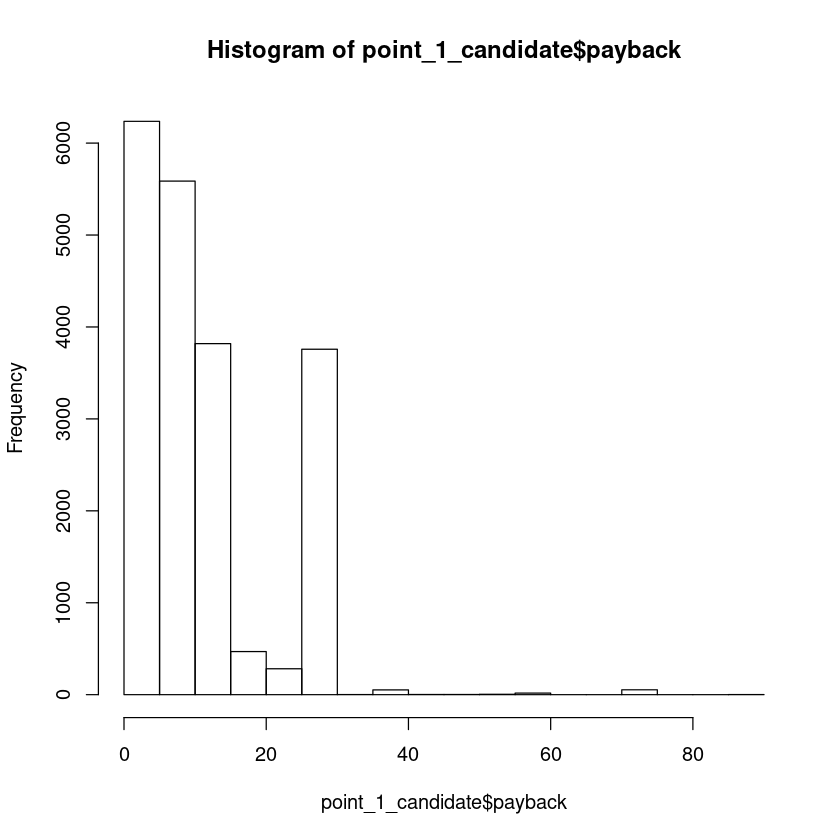

In [9]:
cat(sprintf("With those numbers, breakeven for company will take %0.f months; 
but not all users (according to their recharges) will have a near payback for their phones. Some of them will need more than 2 years to have a breakeven\n\n",
    25*nrow(point_1_candidate)/sum(point_1_candidate$rech_aug_15) ))
cat("Payback by month")
table(cut(point_1_candidate$payback, c(0,6,12,18,24,30,36,100)))
hist(point_1_candidate$payback)

In [10]:
cat(sprintf("Is recomended to only focus on those with a payback lower than 1 year. Under this scenario, campaign will reach %.0f users, with incomes for recharges near to USD %.2f and revenues for phone selling near to %0.f having its breakeven in %.0f months",
            nrow(point_1_candidate[point_1_candidate$payback<12,]),
            sum(point_1_candidate$rech_aug_15[point_1_candidate$payback<12]),
            25*nrow(point_1_candidate[point_1_candidate$payback<12,]),
           25*nrow(point_1_candidate[point_1_candidate$payback<12,])/sum(point_1_candidate$rech_aug_15[point_1_candidate$payback<12])
           ))

Is recomended to only focus on those with a payback lower than 1 year. Under this scenario, campaign will reach 12177 users, with incomes for recharges near to USD 92147.64 and revenues for phone selling near to 304425 having its breakeven in 3 months

### 2) <strong>Customer degradation: </strong>
For each of the activation cohorts, indicate how do active users an recharge value degradates through time.

In [11]:
point_2 <- data %>% 
  filter(action == "Recharge",
         month >= month_added) %>% 
  group_by(user) %>% 
  mutate(change=(value-lag(value))/lag(value)) %>%
  ungroup()

point_2$change[is.nan(point_2$change)] <- 0; point_2$change[is.infinite(point_2$change)] <- 1000 
point_2$change_sign <- sign(point_2$change)

point_2 %>% 
  group_by(month_added, month) %>% 
  summarise(count = n(),
            start = sum(is.na(change_sign)),
            no_change = sum(change_sign==0),
            increase = sum(change_sign>0),
            decrease = sum(change_sign<0)) %>%
  ungroup() %>%
  mutate(level = month-month_added)

`summarise()` regrouping output by 'month_added' (override with `.groups` argument)



month_added,month,count,start,no_change,increase,decrease,level
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,5,64682,64682,NA,NA,NA,0
5,6,64682,0,2265,18047,44370,1
5,7,64682,0,19569,19807,25306,2
5,8,64682,0,26502,16938,21242,3
6,6,60252,60252,NA,NA,NA,0
6,7,60252,0,2657,15534,42061,1
6,8,60252,0,20536,17367,22349,2
7,7,53198,53198,NA,NA,NA,0
7,8,53198,0,2536,13183,37479,1


`summarise()` regrouping output by 'month_added' (override with `.groups` argument)



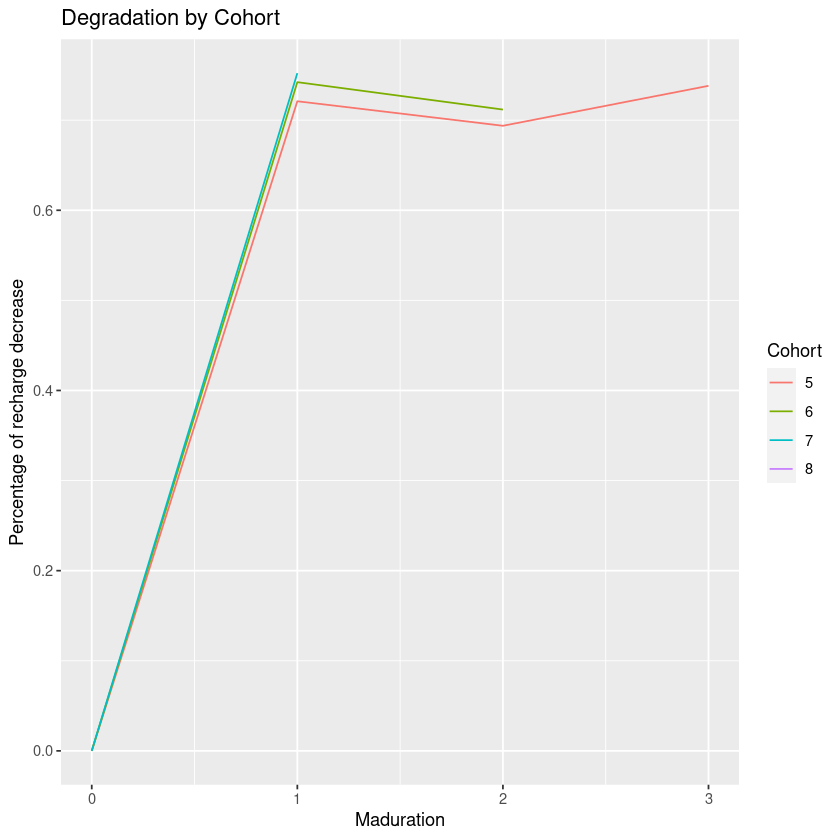

In [12]:
data_graph <- point_2 %>% 
  group_by(month_added, month) %>% 
  summarise(count = n(),
            start = sum(is.na(change_sign)),
            increase = sum(change_sign>0),
            decrease = sum(change_sign<=0)) %>% 
  ungroup() %>% 
  mutate(level = month-month_added,
         perc_dec = decrease/count)

data_graph$perc_dec[is.na(data_graph$perc_dec)] <- 0

data_graph %>% 
  ggplot(aes(x=level,y=perc_dec, color = factor(month_added))) +
  geom_line() + labs(y="Percentage of recharge decrease", x = "Maduration", color = "Cohort") + 
  ggtitle("Degradation by Cohort") 


As seen in harvest graph, all cohorts will have a reduction rate near to 72% after first month, before that, the curve seems to stabiliced between that number. Cases of non-change in the recharge were taken as decrease.

### 3) <strong>New CVP Impact:</strong>
Using all activation cohorts and their August values, calculate de impact of launching the proposed CVP. Assume al users  are willing to spend an additional 10% on their recharge value. Assume al migrations are rational (users save money) and that the 30 days of the month need to be covered with an active plan. Whats the net impact of launching the proposed CVP? How many user will migrate to this new offer? How many are optimizers and how many are upsellers?

<strong>New CVP Offer</strong>

|Variable|Value|
|---|---|
|Price |8|
|Validity (days)|6|
|Minutes|300|
|Data (Mb)|350|
|Extra min|0.05|
|Extra Mb|0.15|

Evaluating 3 scenarios of possible migration (1. Users interested by data and minutes, 2. Users interested only in data - because minutes in CVP are enought, 3. Users interested only in Minutes - because data in CVP are enought)

In [13]:
CVP_new <- data.frame(ADPU = 350*5, MOU = 300*5, Price = 8*5, Data_Extra = 0.15, Minute_Extra = 0.05)

point_3 <- data %>% 
  filter(month == 8) %>% 
  reshape2::dcast(id.var = c("user", "date_added", "month_added"), formula = user ~ variable, value.var = "value") %>% 
  mutate_at("Recharge_August", funs(.*1.10))

Warning message:
“`funs()` is deprecated as of dplyr 0.8.0.
Please use a list of either functions or lambdas: 

  # Simple named list: 
  list(mean = mean, median = median)

  # Auto named with `tibble::lst()`: 
  tibble::lst(mean, median)

  # Using lambdas
  list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


In [17]:
#1. Data and Minutes aren't enought
point_3_1 <- point_3 %>% 
  mutate(New_Price = CVP_new$Price +
           CVP_new$Data_Extra*sapply(point_3$ADPU_August-CVP_new$ADPU, max, 0) +
           CVP_new$Minute_Extra* sapply(point_3$MOU_August-CVP_new$MOU, max, 0) 
  ) %>% 
  filter(
    ADPU_August >= CVP_new$ADPU,
         MOU_August >= CVP_new$MOU,
         Recharge_August + Revenue_August >= New_Price)  
cat("Scenario 1 \n")
cat(sprintf("We find %0.f users that will be interested in this new plan because data and minute offers are better than prepaid plan, impacting incomes for company in USD %2.f \n",
    nrow(point_3_1), sum(point_3_1$Revenue_August,point_3_1$Recharge_August, -point_3_1$New_Price) ))
point_3_1 

Scenario 1 
We find 15 users that will be interested in this new plan because data and minute offers are better than prepaid plan, impacting incomes for company in USD 411 


user,ADPU_August,MOU_August,Recharge_August,Revenue_August,New_Price
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
548,1784.139,1606.617,54.15385,43.96629,50.45164
5363,1846.427,2387.683,76.15385,49.41057,98.84815
6597,1980.798,1638.983,49.92308,32.47615,81.56882
14614,2269.587,1789.467,82.01236,71.81235,132.41135
16347,1819.137,1582.600,34.12414,31.45997,54.50049
38572,1767.394,1640.983,27.07692,27.79445,49.65824
46551,1815.566,1751.183,66.49085,28.34849,62.39410
56150,1964.383,1759.200,55.84615,49.92215,85.11743
58137,2223.086,1760.350,61.76923,67.38160,123.98047


In [19]:
#1. Data is't enought
point_3_2 <- point_3 %>% 
  mutate(New_Price = CVP_new$Price +
           CVP_new$Data_Extra*sapply(point_3$ADPU_August-CVP_new$ADPU, max, 0) +
           CVP_new$Minute_Extra* sapply(point_3$MOU_August-CVP_new$MOU, max, 0) 
  ) %>% 
  filter(
    ADPU_August >= CVP_new$ADPU,
         Recharge_August + Revenue_August >= New_Price)  
cat("Scenario 2:\n")
cat(sprintf("We find %0.f users that will be interested in this new plan because data offers is better than prepaid plan, impacting incomes for company in USD %2.f \n",
    nrow(point_3_2), sum(point_3_2$Revenue_August,point_3_2$Recharge_August, -point_3_2$New_Price) ))
point_3_2

Scenario 2:
We find 137 users that will be interested in this new plan because data offers is better than prepaid plan, impacting incomes for company in USD 3511 


user,ADPU_August,MOU_August,Recharge_August,Revenue_August,New_Price
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
548,1784.139,1606.61667,54.15385,43.96629,50.45164
1200,1773.618,447.10000,25.38462,23.68794,43.54267
1994,1750.784,63.11667,33.84268,20.06735,40.11766
2495,1751.525,364.41667,38.92308,16.71990,40.22876
4140,1796.793,851.03333,54.15385,51.81587,47.01889
4471,1766.762,175.96667,32.37507,32.72993,42.51437
5363,1846.427,2387.68333,76.15385,49.41057,98.84815
5497,1873.744,391.66667,33.78548,26.51494,58.56164
6484,1905.768,184.85000,32.15385,33.80969,63.36521


In [20]:
#1. Minutes aren't enought
point_3_3 <- point_3 %>% 
  mutate(New_Price = CVP_new$Price +
           CVP_new$Data_Extra*sapply(point_3$ADPU_August-CVP_new$ADPU, max, 0) +
           CVP_new$Minute_Extra* sapply(point_3$MOU_August-CVP_new$MOU, max, 0) 
  ) %>% 
  filter(
    MOU_August >= CVP_new$MOU,
         Recharge_August + Revenue_August >= New_Price)  

cat("Scenario 3: \n")
cat(sprintf("We find %0.f users that will be interested in this new plan because data offers is better than prepaid plan, impacting incomes for company in USD %2.f \n",
    nrow(point_3_3), sum(point_3_3$Revenue_August,point_3_3$Recharge_August, -point_3_3$New_Price) ))
point_3_3

Scenario 3: 
We find 354 users that will be interested in this new plan because data offers is better than prepaid plan, impacting incomes for company in USD 12948 


user,ADPU_August,MOU_August,Recharge_August,Revenue_August,New_Price
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
548,1.784139e+03,1606.617,54.15385,43.96629,50.45164
899,5.136501e+02,1608.100,33.00000,30.14163,45.40500
2939,2.576955e+02,2104.633,54.32308,48.24596,70.23167
4563,0.000000e+00,1591.367,37.55468,31.09977,44.56833
4691,0.000000e+00,1742.033,89.69231,80.75863,52.10167
5363,1.846427e+03,2387.683,76.15385,49.41057,98.84815
5644,8.424748e+01,1521.000,33.62827,16.14216,41.05000
5749,0.000000e+00,2813.983,60.07692,45.89530,105.69917
5926,0.000000e+00,2004.017,50.85503,27.78539,65.20083


In [22]:
#Grouping these scenarios, new CVP could impact 
real_impact <- distinct(rbind(point_3_1,point_3_2,point_3_3), user, `.keep_all` = TRUE )
cat("Joining scenarios: \n")
cat(sprintf("Grouping 3 possible scenarios,  %0.f users will be interested in CVP, impacting incomes for company in USD %2.f \n",
    nrow(real_impact), sum(real_impact$Revenue_August,real_impact$Recharge_August, -real_impact$New_Price) ))
real_impact

Joining scenarios: 
Grouping 3 possible scenarios,  476 users will be interested in CVP, impacting incomes for company in USD 16047 


user,ADPU_August,MOU_August,Recharge_August,Revenue_August,New_Price
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
548,1784.139,1606.61667,54.15385,43.96629,50.45164
5363,1846.427,2387.68333,76.15385,49.41057,98.84815
6597,1980.798,1638.98333,49.92308,32.47615,81.56882
14614,2269.587,1789.46667,82.01236,71.81235,132.41135
16347,1819.137,1582.60000,34.12414,31.45997,54.50049
38572,1767.394,1640.98333,27.07692,27.79445,49.65824
46551,1815.566,1751.18333,66.49085,28.34849,62.39410
56150,1964.383,1759.20000,55.84615,49.92215,85.11743
58137,2223.086,1760.35000,61.76923,67.38160,123.98047
